# Visualisierung des Gradientenabstiegsverfahren

## 1. Einleitung

Das Notebook hat verschiedene Möglichkeiten zum Einstellen.

Im folgenden Beispiel erkennt man das Schema:
#### %run Gradientenabstiegsverfahren.py "x**5-x**2*np.sin(x)" -1 2 -3 4 10 2.5 0.8 1 1000
    Funktion :        "x**5-x**2*np.sin(x)"   
    x1 :              -2
    x2 :               2 
    y1 :              -3 
    y2 :               2 
    Iterationen :      10 
    Startwert :        2.5
    Schrittweite :     1
    Schrittweiten-
    anpassung :        0.8 
    Zeit zwischen den 
    Sequenzen in ms :  1000

#### Iterationen und Zeit zwischen den Sequezen müssen Integer sein.

Schrittweite wird nur angepasst, wenn sich das Vorzeichen der Gradienten ändert.
Es macht nur wenig Sinn die Schrittweite anzupassen, wenn man das Tal noch nicht gefunden hat!

## 2. Erklärung der folgenden Beispiele
#### Die Beispiele sind bewusst übertrieben gewählt!

Sie sollen anschaulich sein. Einige Beispiele zeigen nur Funktionen mit 1-2 Tälern im zwei Dimensionalen.
Zwei Dimensionen entspricht aber nur einem Fehler in einem neuronalen Netzwerk. 
Bereits in drei Dimensionen kann es viel mehr Täler geben. 
#### Diese einfache Thematik im 2 Dimensionalen muss als ein Problem in einer viel höheren Dimension vorgestellt werden.

#### Die folgenden Funktionen werden nur im dargestellten Intervall betrachtet. 
Ohne Intervallbegrenzungen besitzen einige Funktionen kein globales Minimum, sondern divergieren bis ins negative Unendlich.

In [1]:
# Darf nur einmal ausgeführt werden. Erzeugt keinen Error, aber unangenehme Fehlermeldungen!
%matplotlib notebook
import matplotlib.pyplot as plt

### Einführendes Beispiel


<IPython.core.display.Javascript object>


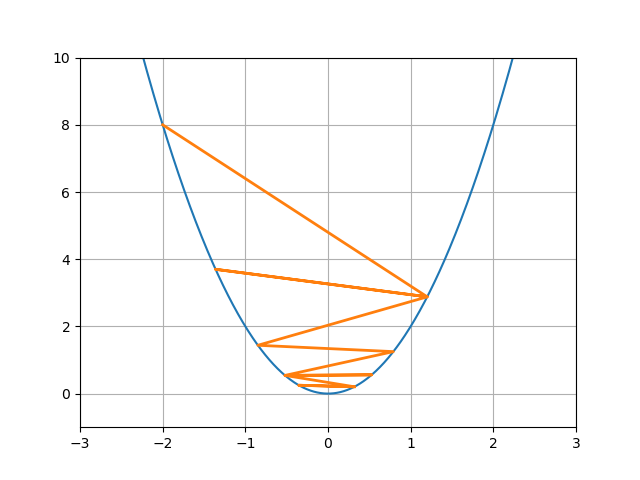

In [2]:
%reset -f
#run Gradientenabstiegsverfahren.py "2*x**2"  x1 x2  y1 y2  It x0  sw kond pause
%run Gradientenabstiegsverfahren.py "2*x**2" -3  3  -1  10  15 -2  4  0.8 1000

### Problem 1
#### Funktion springt im Tal zwischen zwei Werten.
Die folgende Funktion springt vom Wert x=0.5 und x=1.5 hin und her, weil die Schrittweite 1 beträgt und nicht angepasst wird.
Ein sehr triviales und anschauliches Beispiel, was bei fehlender Konditionierung  überall und auch mit anderen Werten auftreten kann.

<IPython.core.display.Javascript object>


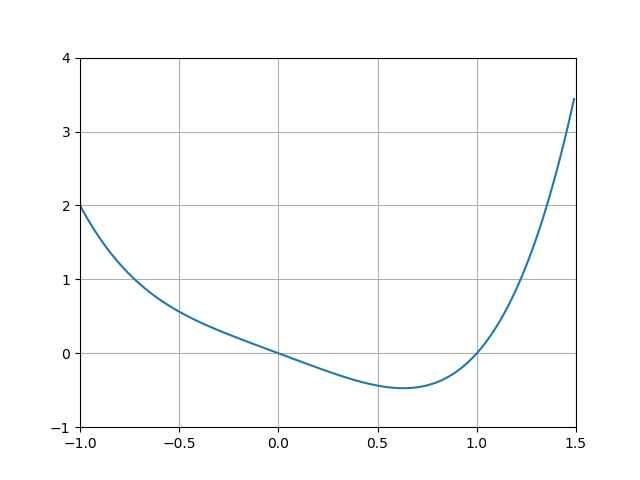

In [3]:
%reset -f
#run Gradientenabstiegsverfahren.py "x**4-x" x1  x2  y1 y2 It x0  sw kond pause
%run Gradientenabstiegsverfahren.py "x**4-x" -1  1.5 -1 4  10 1.5  1  1   1000

### Immernoch kovergiert die Funktion sehr langsam.
#### Schrittweiten können zu groß und zu klein gewählt sein !

<IPython.core.display.Javascript object>


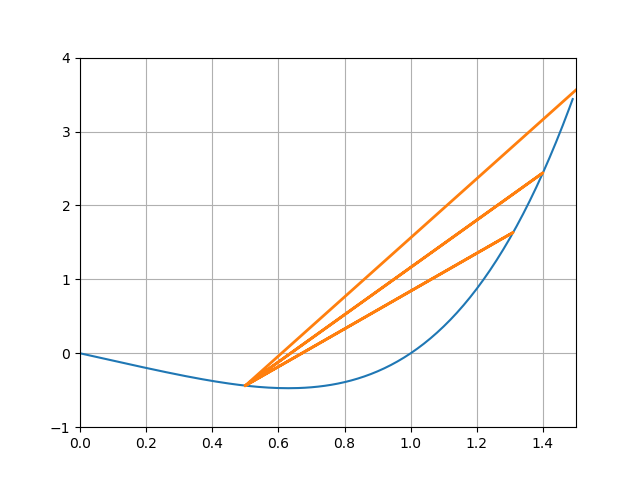

In [4]:
%reset -f
#run Gradientenabstiegsverfahren.py "x**4-x" x1  x2  y1 y2 It x0  sw kond pause
%run Gradientenabstiegsverfahren.py "x**4-x" 0  1.5 -1 4  30 1.5 1  0.9   500

<IPython.core.display.Javascript object>


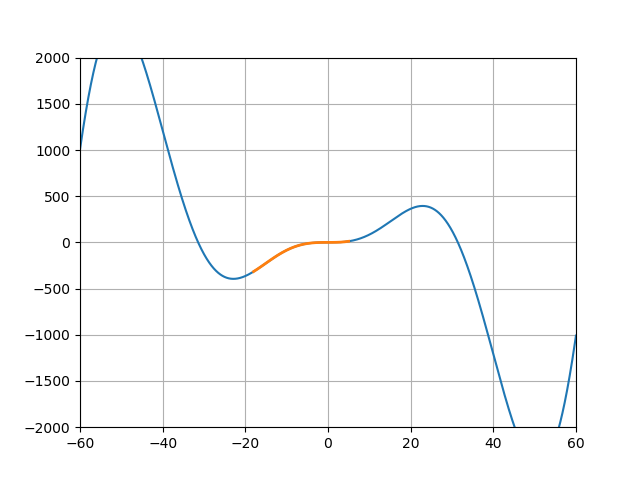

In [5]:
%reset -f
#run Gradientenabstiegsverfahren.py "sin(1/10*x)*x**2"  x1 x2  y1    y2    It x0  sw kond pause
%run Gradientenabstiegsverfahren.py "sin(1/10*x)*x**2" -60 60 -2000  2000  100 5  1  0.8 1000

## Erkenntnis 
#### Gradientenabstiegsverfahren können nicht ohne Weiteres perfektioniert werden.
Die Geschwindigkeit der Konvergenz ist abhängig von den Variablen und der Funktion selbst.

## Weitere Probleme und entsprechende Möglichkeiten sie zu beheben.

### Problem 2 
#### Lokales Minimum wurde ereicht, aber nicht das globale Minimum

Dies lässt sich nicht vollständig lösen, denn ein anderer Startwert kann genauso in ein lokales Minimum münden, wie unterschiedliche Konditionierung oder Schrittweiten. 
Es lässt sich nur unwahrscheinlicher werden lassen, in dem man die Startwerte variieren lässt.

<IPython.core.display.Javascript object>


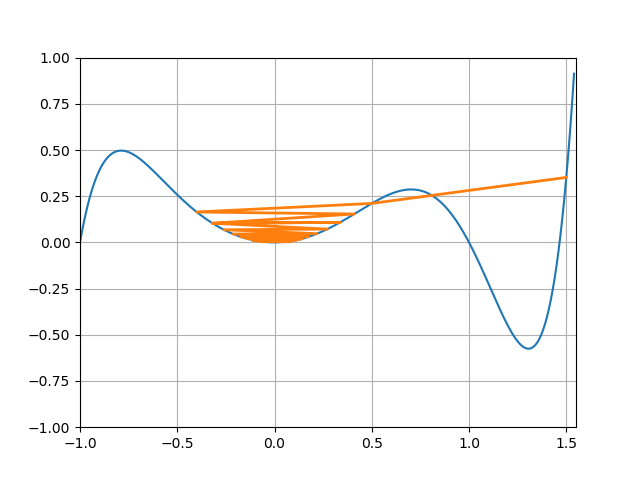

In [6]:
%reset -f
#run Gradientenabstiegsverfahren.py "x**7-x**6-x**5+x**2" x1  x2    y1  y2  It  x0  sw kond pause
%run Gradientenabstiegsverfahren.py "x**7-x**6-x**5+x**2" -1  1.55  -1   1  30  1.5  1  0.9   500

# 3. Lösen von Linearen Gleichungssystemen mit dem Gradientenverfahren

### Dabei unterscheidet man zwischen der unkonjugierten und der konjugierten Variante

Die Idee des Verfahrens besteht darin, dass das Optimieren einer quadratischen Funktion äquivalent damit ist, ein lineares Gleichungssystem mit einer 
#### symmetrisch, positiv definiten Matrix 
zu lösen.

#### Grad f(x) = A*x - b

Im folgenden Beispiel erkennt man wieder das Schema:

%run konjGradientGLS.py "3,2,2,6" "1,0" "2,-8" 0.01 1000 False

    Matrix A                - "3,2,2,6"    (2x2)
    Startvektor             - "1,0" 
    b                       - "2,-8" 
    Epsilon                 - 0.01 
    Intervall zw Seq        - 1000 
    Konjugiertes Verfahren? - True

Die Funktion kann auch mit bis zu 100x100 Matrizen rechnen. Allerdings sind diese nicht mehr in einem Plot darstellbar und werden somit nur ausgegeben.

<IPython.core.display.Javascript object>


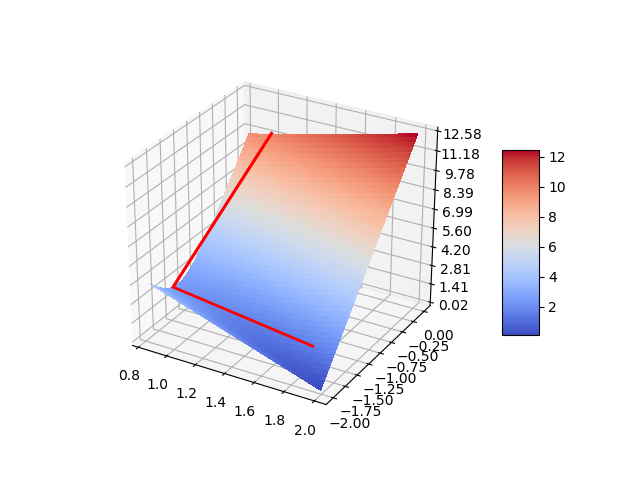

In [7]:
%run konjGradientGLS.py "3,2,2,6" "1,0" "2,-8" 0.01 1000 False

<IPython.core.display.Javascript object>


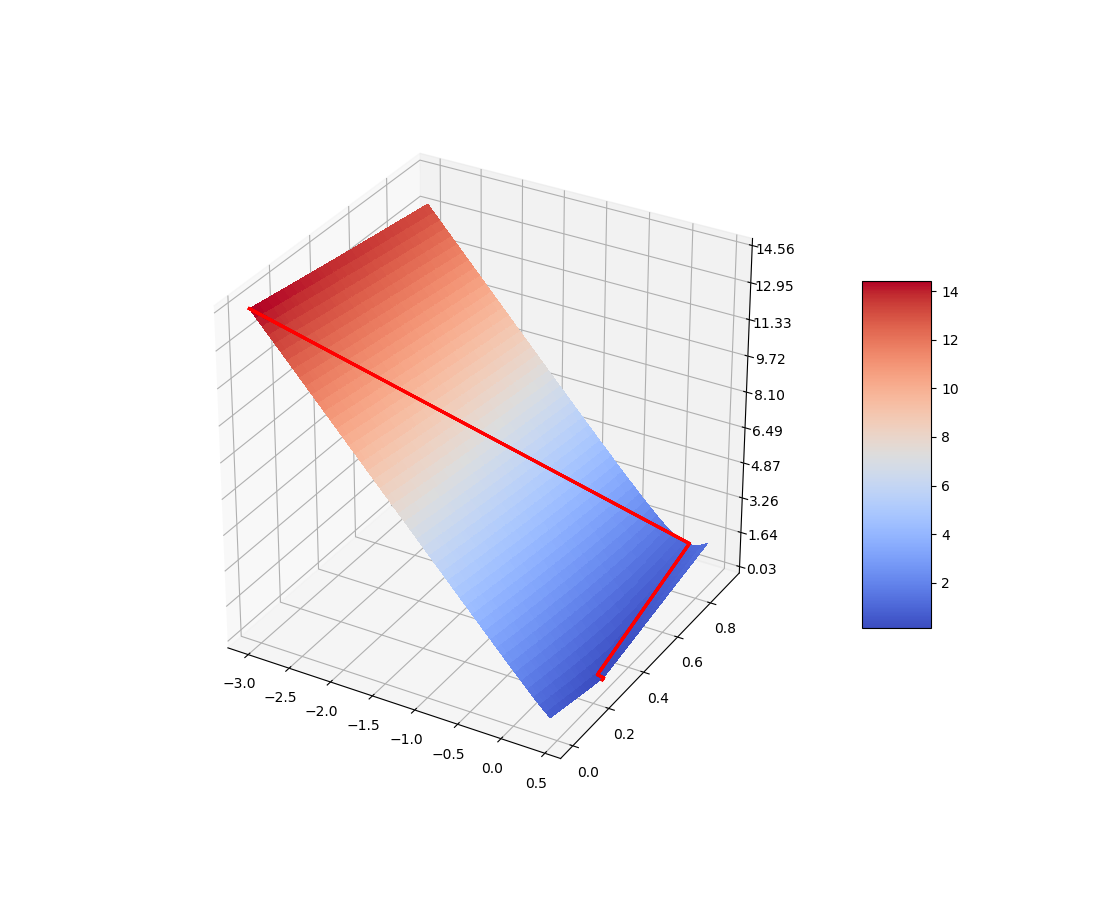

In [8]:
%run konjGradientGLS.py "4,1,1,2" "-3,0" "2,1" 0.01 1000 False

# Lineare Regression mit Hilfe des Gradientenabstiegsverfahren

## Konstruktion eines linearen Zusammenhangs zwischen zufallsgenerierten Werten

Im Folgenden wollen wir uns anschauen wie man mit Hilfe des Gradientenabstiegsverfahren eine lineare Regression durchführen kann. Dazu generieren wir uns zuerst 100 x-Werte und zugehörige y-Werte und Plotten diese.

<IPython.core.display.Javascript object>


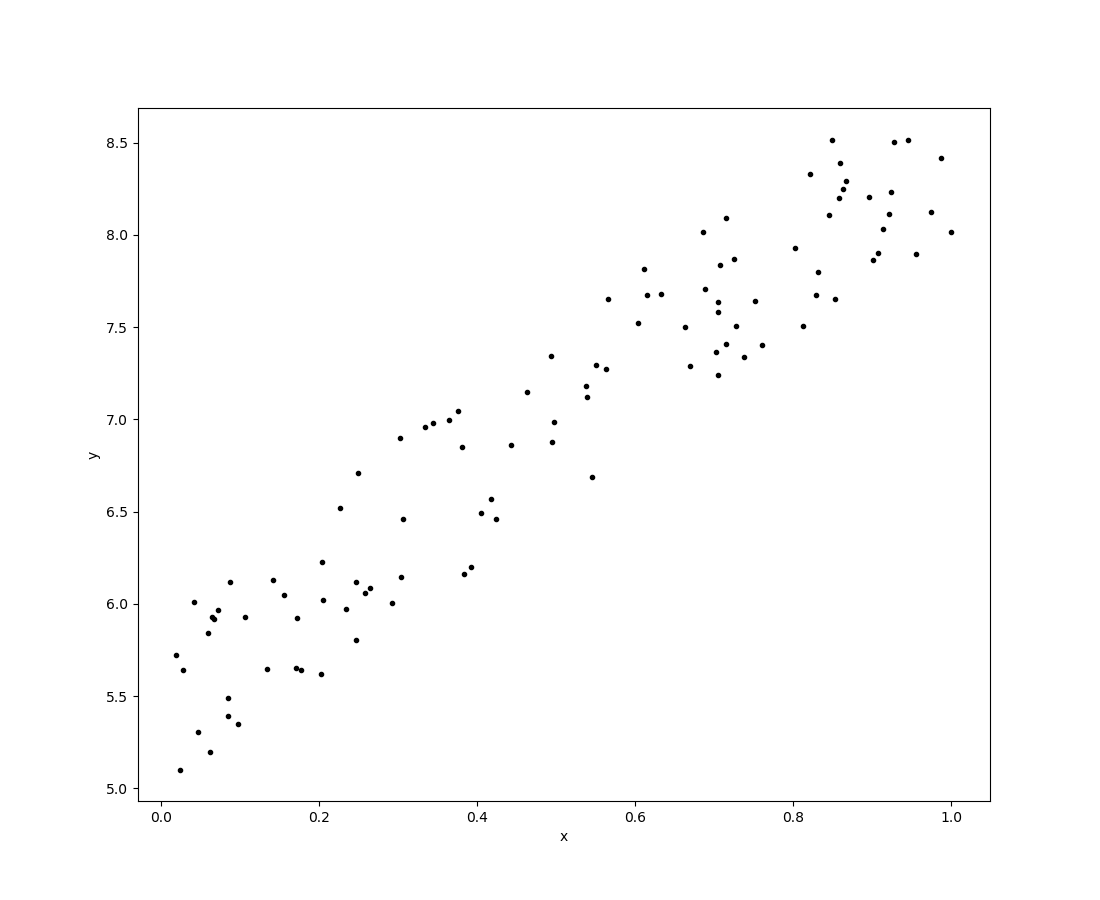

Text(0,0.5,'y')

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Anzahl der Werte
num_samp = 100

# Zufällig generierte Werte
x = np.random.rand(num_samp, 1)
y = 3*x+5+np.random.rand(num_samp, 1)

# Plot der Punkte
fig1, ax1 = plt.subplots()
ax1.plot(x,y,"k.")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

## Erklärung der Funktionsweise

Wir wollen für jeden Schritt den das Verfahren macht die dazugehörigen Kosten berechnen. Das liefert uns die Funktion Kosten. Sie berechnet die geratenen y-Werte mit dem eingegebenen Lösungsvektor und berechnet dann die Summe der quadrierten Differenzen zwischen dem geratenen Ergebnis under dem korrekten y-Wert.

Um im Nachhinein unser Gradientenabstiegsverfahren auswerten zu können werden bei der Regressionsfunktion Arrays erstellt, welche den Verlauf der Kosten und den des Lösungsvektor speichern und am Ende der Iterationen ausgeben. Die Funktion führt dann eine feste Anzahl an Iterationen aus. Für jede Iteration wird der Fehler des Lösungsvektors zu den eigentlichen y-Werten berechnet. Dieser Vektor wird dann in Richtung des steilsten Abstiegs durch eine vorher festgelegte Schrittweite korrigiert. Wir minimieren also die Fehlerfunktion. 
Anschließend wird der gesuchte Lösungsvektor, das Array zum Verlauf des Lösungsvektors und das zum Verlauf der Kosten ausgegeben.

Es ist ratsam zum vollständigen Verständnis den Code der Datei Regression.py durchzugehen.

In [20]:
from RegressionPlotCopy1 import Regression
# Startvektor (0,0)
lv = np.array([[0], [0]])
# Anzahl der Iterationen
num_it = 500

loesung, verlauf, kosten = Regression(lv, x, y, num_it)

## Veranschaulichung der Ergebnisse


Der Plot des Kostenverlaufes in Abhängigkeit von den Iterationen gestaltet sich recht simpel. Hier kann man gut erkennen, dass sich im gewählten Beispiel schon nach etwas mehr als der Hälfte aller Iterationen eine kaum merkbare Verbesserung festzustellen ist.

<IPython.core.display.Javascript object>


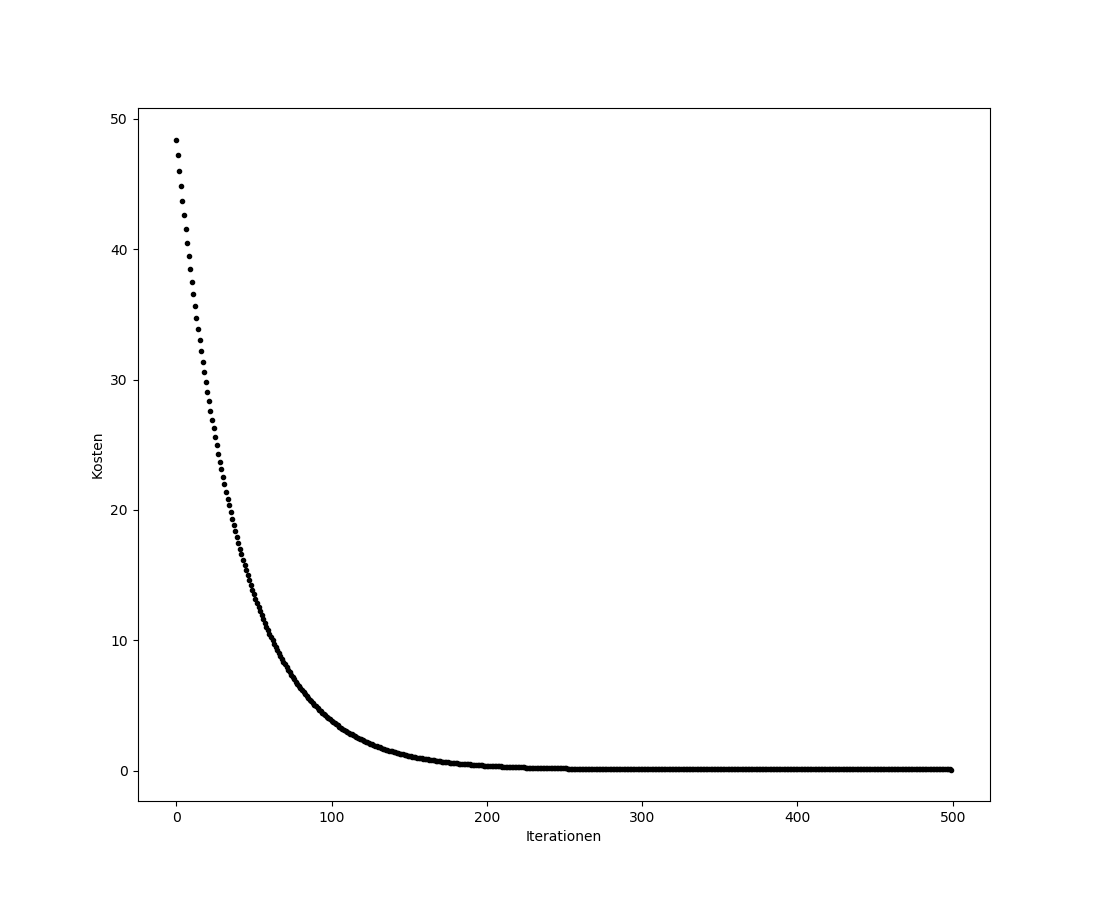

Text(0,0.5,'Kosten')

In [17]:
# Kosten in Abhängigkeit der Iterationen
fig2, ax2 = plt.subplots()
ax2.plot(np.arange(0, num_it, 1), kosten, "k.")
ax2.set_xlabel("Iterationen")
ax2.set_ylabel("Kosten")

Nun wollen wir die Kostenfunktion plotten. Unser Anzeigebereich entsteht in Abhängigkeit von der finalen Lösung. Wir berechnen dann mit Hilfe unserer Kostenfunktion die Abweichung aller berechneten Lösungsvektoren von der korrekten Lösung. Zusätzlich markieren wir die Werte die nach einem Drittel, der Hälfte und allen Iterationen angenommen wurden. Es lässt sich sehr schön erkennen wie der Lösungsvektor langsam in die Richtung wandert in welcher der Fehler immer kleiner wird.

<IPython.core.display.Javascript object>


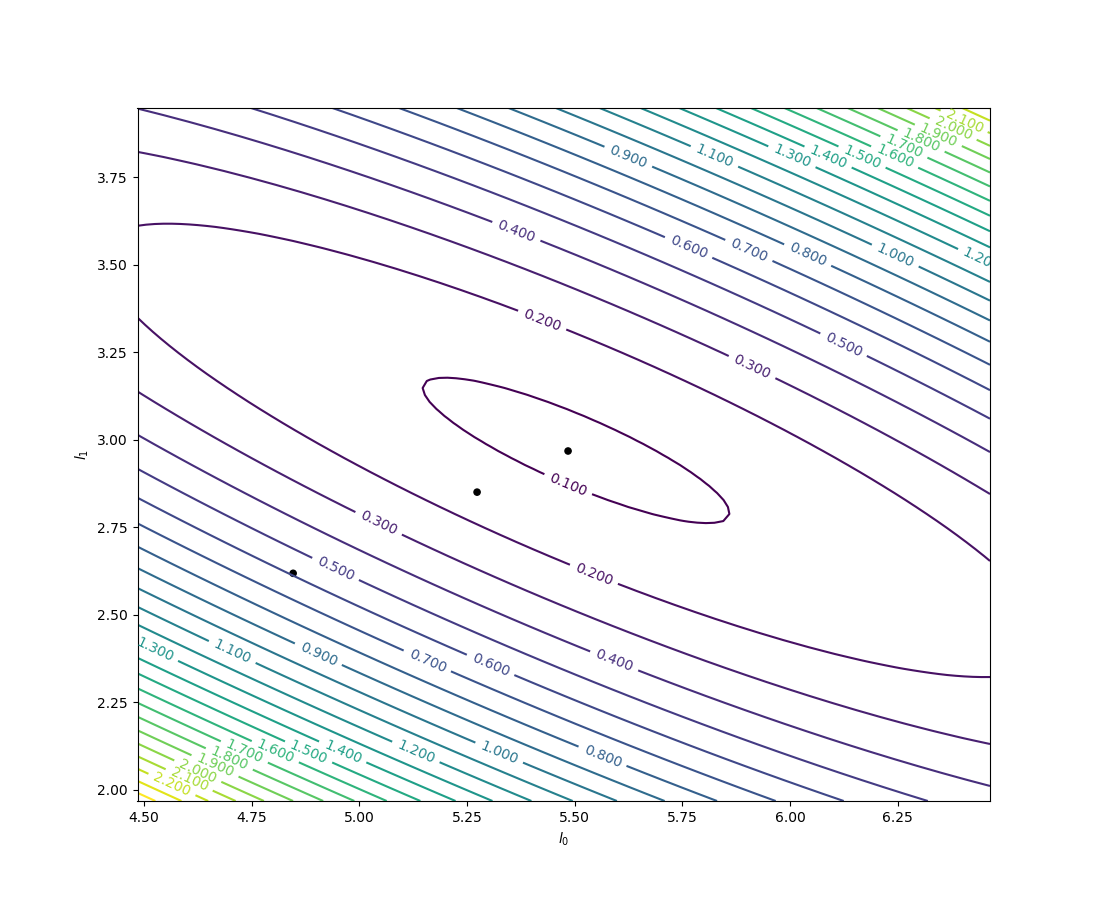

In [21]:
# Kostenfunktion
from RegressionPlotCopy1 import PlotKosten
PlotKosten(loesung, verlauf, x, y)

Im folgenden Beispiel erkennt man wieder das Schema:

%run RegressionPlot.py "0.0,0.0" "random" "random" 500 0.01

    Lösungsvektor           - "0.0,0.0"
    X Werte                 - "random   Oder  expliziter Vektor von x-Werten
    Y Werte                 - "random   Oder  expliziter Vektor von y-Werten
    Iterationen             - 500 
    Schrittweite            - 0.01 
    
#### Nun folgt das komplette Beispiel mit Einstellungsmöglichkeiten

[[5.52298471]
 [2.88092243]] 



<IPython.core.display.Javascript object>


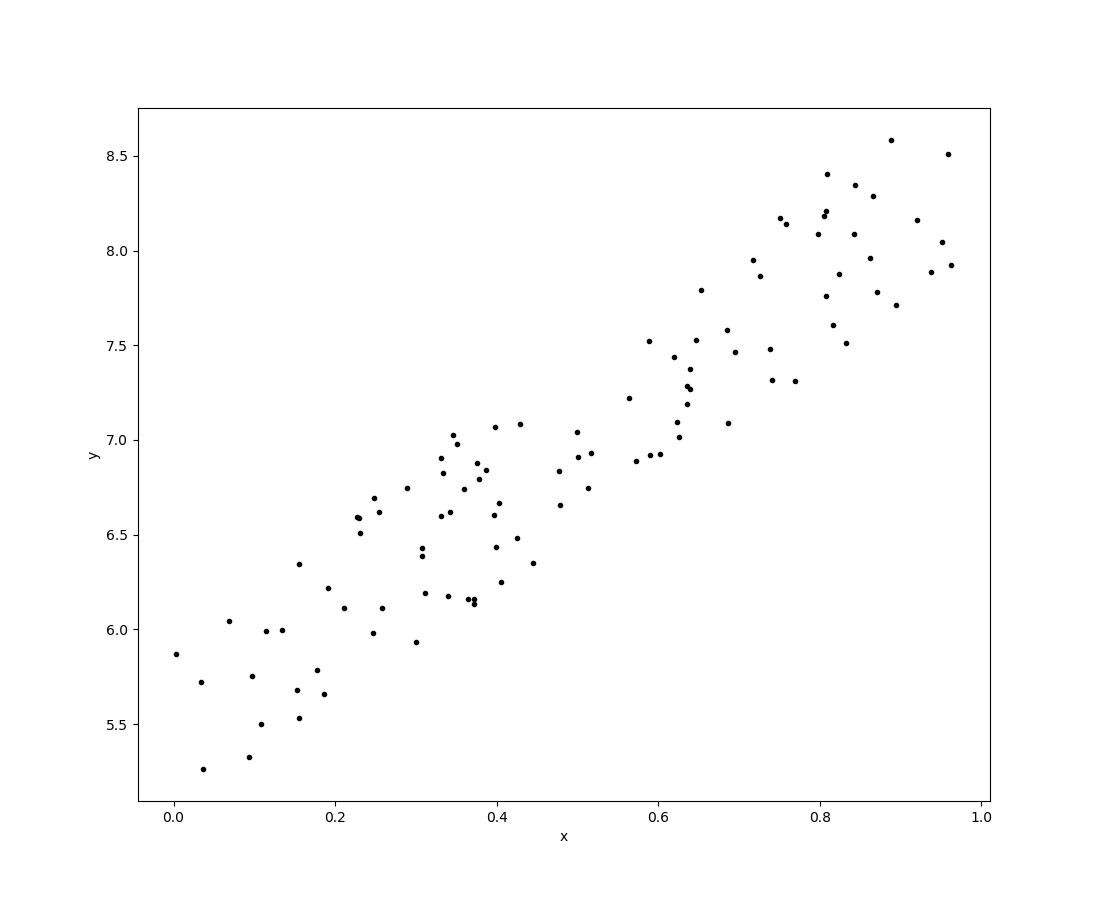

<IPython.core.display.Javascript object>


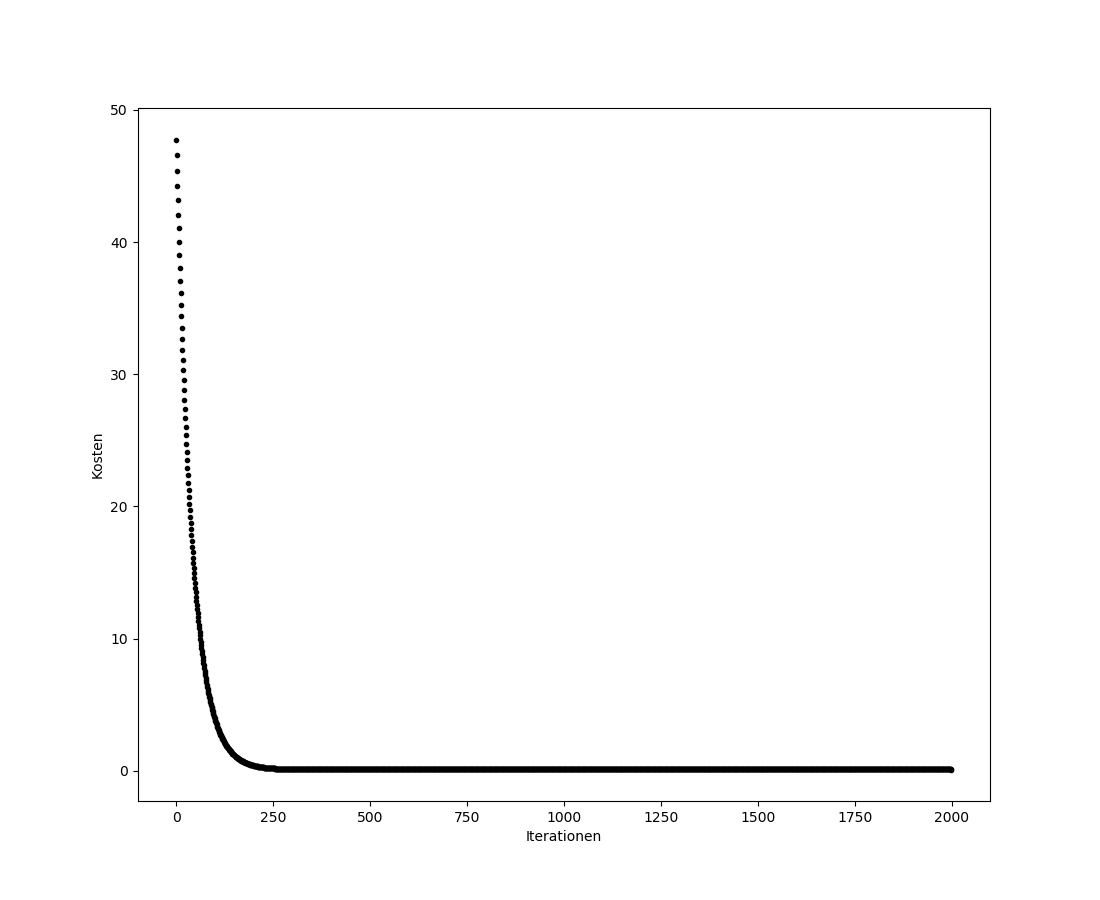

<IPython.core.display.Javascript object>


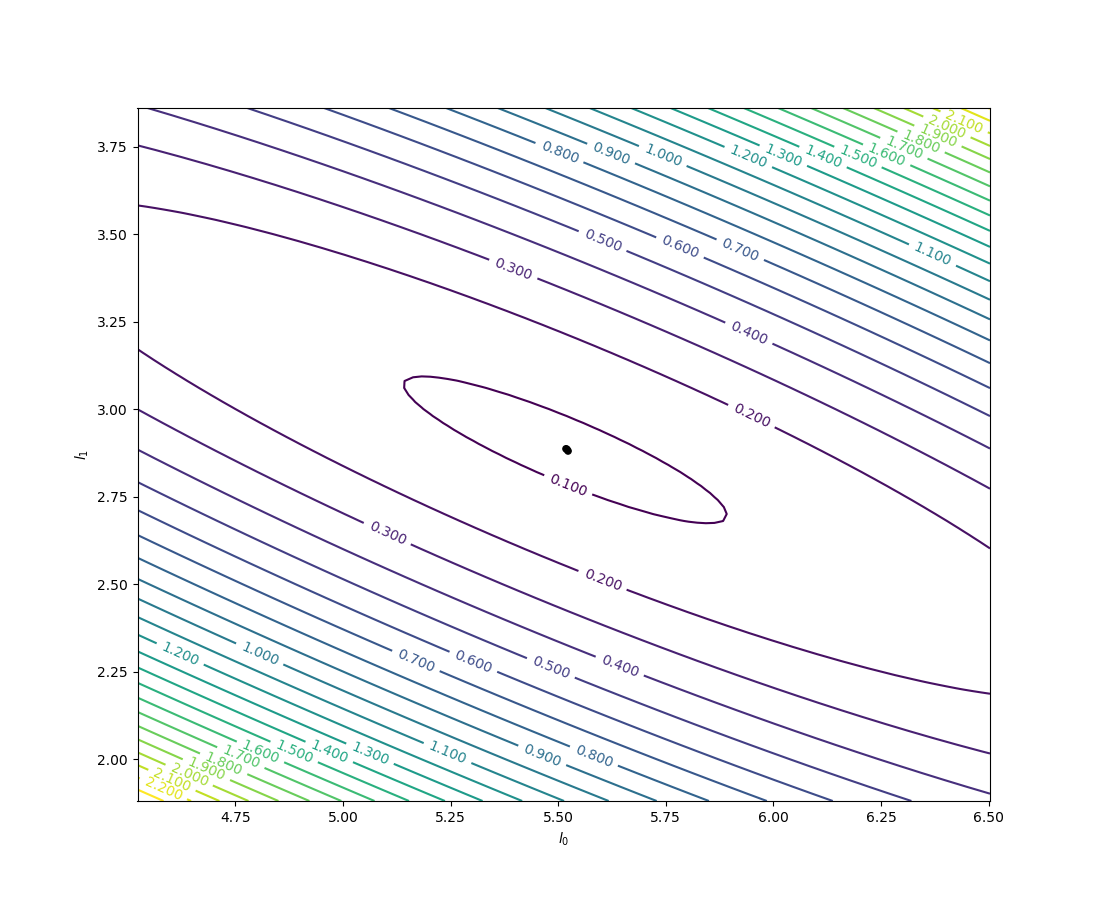

In [24]:
%run RegressionPlot.py "0.0,0.0" "random" "random" 2000 0.01